# Agrupamiento Jerarquico
* Su estructura se asemeja a un arbol o un dendograma
* Existen dos tipos de agrupacion en este caso:
    * Aglomerativa: o Ascedente, cada dato es un cluster y se va fucionando con sus vecinos hasta obtener un cluster general. El usuario elige en que punto los clusters cumplen las condiciones requeridas
    * Divisivo: Es inverso al proceso aglomerativo, todos los datos empiezan como un cluster y se van dividiendo
    
### Medidas de Vinculación
* Enlace Completo: Fusiona los clusteres segun la distancia Maxima entre clusteres.
* Enlace Simple: Fusiona los clusteres segun su distancia minima entre ellos.
* Enlace Promedio: Distancia media entre clusteres
* Metodo del centroide: Distancia entre centroides de cada cluster
* Metodo de Ward: Considera la suma de las distancias cuadradas dentro de los datos del cluster

Recomedados: Simple para patrones claros, figuras definidas. Ward: puntos con altas dispersiones y sin definiciones claras de patrones evidentes.

### Medidas de distancia
1. Euclidiana: Medida recta entre dos puntos.
2. Manhattan: Calcula el cuadrado entre las distancias de los ejes tanto X, Y y Z
3. Distancia del coseno

# Algunas desventajas:
    * Es sensible al ruido
    * Es computacionalmente costoso por lo que no se recomienda para grandes volumenes de datos
    * Se debe definir K clusteres

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# PREPARANDO LOS DATOS A USAR
clientes = pd.read_csv("Clientes Ventas.csv")

#Seleccionando las columnas que se usaran
clientes = clientes.iloc[:, 2:]

#Cambiando el nombre de las columnas
clientes.columns=["Verduras", "Leche", "Comestibles", "Congelados","PapelyDetergentes","Otros"]

In [3]:
# SELECCIONANDO UNA MUESTRA PARA LUEGO CLASIFICARLA
indices = [23, 126, 360]
muestras=pd.DataFrame(clientes.loc[indices])
clientes = clientes.drop(indices, axis=0) # Se eliminan del DF original para que el modelo no los tome

,Verduras,Leche,Comestibles,Congelados,PapelyDetergentes,Otros
23,26373,36423,22019,5154,4337,16523
126,19219,1840,1658,8195,349,483
360,19746,2872,2006,2601,468,503


## Escalando los datos

In [7]:
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(clientes)

muestras= preprocessing.Normalizer().fit_transform(muestras)

In [8]:
# Definiendo datos para el Modelo
x = data_escalada

-------------

## Entrenando el MODELO

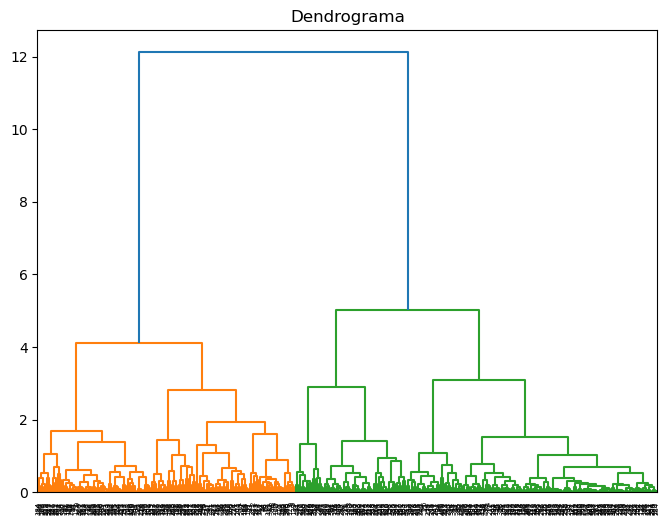

In [17]:
import scipy.cluster.hierarchy as shc #Graficas del dendrograma

plt.figure(figsize=(8,6))
plt.title("Dendrograma")
dendrograma = shc.dendrogram(shc.linkage(x, method="ward")) #Metodo de Vinculacion

#IMPORTANTE: Al hacer el dendrograma se analiza la linea mas larga y ahi se observa el nro de K que se deberia usar, 
#para este caso K=3

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
# DEFINIENDO EL ALGORITMO
algoritmo = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

In [23]:
#ENTRENANDO EL MODELO
algoritmo.fit(x)

AgglomerativeClustering(n_clusters=3)

In [28]:
### PREDECIR DATOS DE MUESTRA
predicciones = algoritmo.fit_predict(muestras)# No olvidar que la muestra debe estar escalada

## MOSTRANDO LOS RESULTADOS

In [27]:
for i,j in enumerate(predicciones):
    print(f"La muestra {i} se encuentra en el cluster {j}")

La muestra 0 se encuentra en el cluster 1
La muestra 1 se encuentra en el cluster 2
La muestra 2 se encuentra en el cluster 0
